In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

In [5]:
# Read the CSV file
csv_file_path = '/content/drive/MyDrive/datasets/income.csv'
df = pd.read_csv(csv_file_path)

# Perform operations on the dataframe
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [6]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

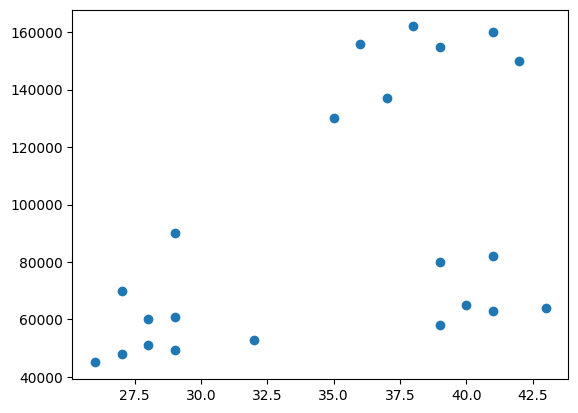

In [7]:
plt.scatter(df['Age'], df['Income($)'])

In [9]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [10]:
def get_model_params(model):
  model_params = model.get_params()

  for x, y in model_params.items():
    print(f"{x}: {y}")

In [11]:
get_model_params(km)

algorithm: lloyd
copy_x: True
init: k-means++
max_iter: 300
n_clusters: 3
n_init: warn
random_state: None
tol: 0.0001
verbose: 0


In [13]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


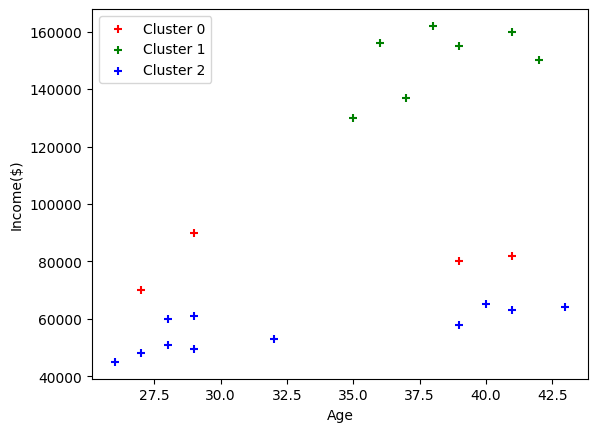

In [18]:
import matplotlib.pyplot as plt

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='red', marker='+', label='Cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='green', marker='+', label='Cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='blue', marker='+', label='Cluster 2')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

plt.show()


we need to use minmaxscaler to normalize our data, not using it will result to a not scalable presenatiton

In [30]:
# scaler = MinMaxScaler()
# scaler.fit(df[['Income($)']])
# df['Income($)'] = scaler.transform(df[['Income($)']])

# scaler.fit(df[['Age']])
# df.Age = scaler.transform(df[['Age']])
# df.head()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = ['Income($)', 'Age']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [31]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [32]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


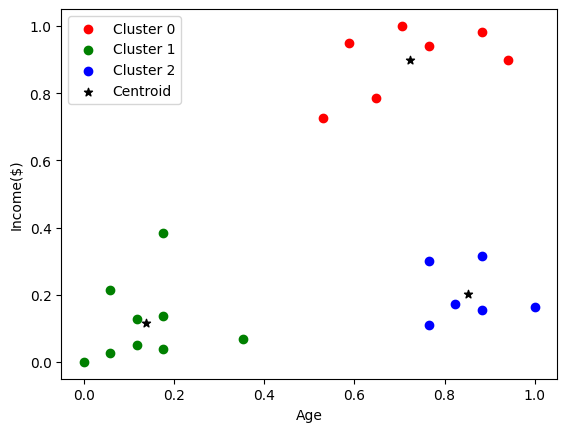

In [38]:
import matplotlib.pyplot as plt

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='red', label='Cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='green', label='Cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='blue', label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', color='black', label='Centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

plt.show()


In [35]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [36]:
get_model_params(km)

algorithm: lloyd
copy_x: True
init: k-means++
max_iter: 300
n_clusters: 3
n_init: warn
random_state: None
tol: 0.0001
verbose: 0


## ELBOW TECHNIQUE

In [39]:
k_rng = range(1, 10)
sse = []

for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income($)']])
  sse.append(km.inertia_) # will give sse

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [40]:
sse

[5.434011511988176,
 2.091136388699076,
 0.4750783498553094,
 0.34910470944195643,
 0.2664030124668415,
 0.2105547899547249,
 0.18122153830313417,
 0.13781880133764024,
 0.10188787724979426]

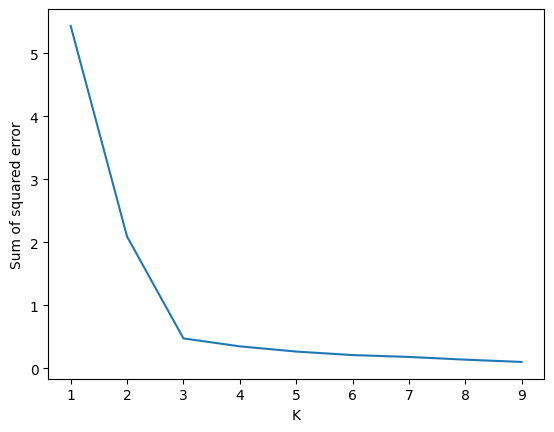

In [41]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

3 is the point wehre the elbow exists

In [44]:
from sklearn.datasets import load_iris
df = load_iris()
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [45]:
df_iris = pd.DataFrame(df.data, columns=df.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
# from sklearn.cluster import KMeans
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt
# %matplotlib inline

from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
y_predicted = model.fit_predict(df_iris.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1))
y_predicted


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [49]:
df_iris['cluster'] = y_predicted
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [50]:
df_iris = (df_iris.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1))
df_iris.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


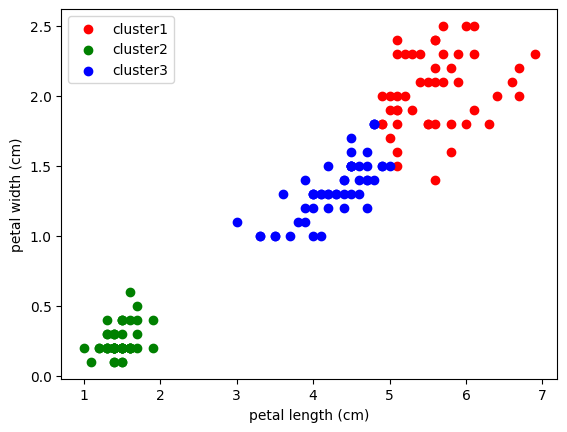

In [54]:
import matplotlib.pyplot as plt

df1 = df_iris[df_iris['cluster'] == 0]
df2 = df_iris[df_iris['cluster'] == 1]
df3 = df_iris[df_iris['cluster'] == 2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red', label='cluster1')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='green', label='cluster2')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='blue', label='cluster3')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

plt.show()


In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = ['petal length (cm)', 'petal width (cm)']

df_iris[columns_to_scale] = scaler.fit_transform(df_iris[columns_to_scale])

df_iris.head()


,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [56]:
df_iris.drop('cluster', axis=1, inplace=True)

In [57]:
df_iris.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [58]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
y_predicted = model.fit_predict(df_iris)
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [59]:
df_iris['cluster'] = y_predicted
df_iris

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


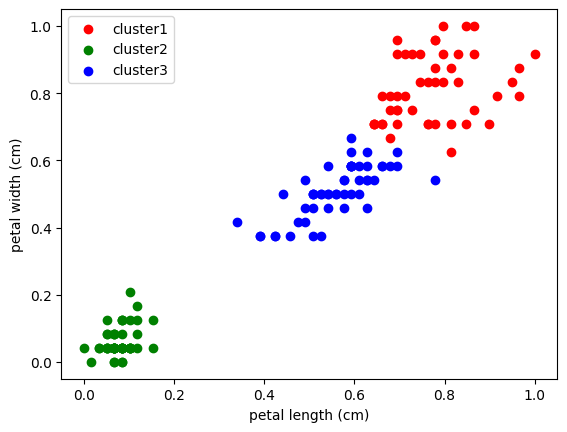

In [60]:
import matplotlib.pyplot as plt

df1 = df_iris[df_iris['cluster'] == 0]
df2 = df_iris[df_iris['cluster'] == 1]
df3 = df_iris[df_iris['cluster'] == 2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red', label='cluster1')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='green', label='cluster2')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='blue', label='cluster3')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

plt.show()


In [64]:
sse = []
k_rng = range(1, 10)

for k in k_rng:
  model_sample = KMeans(n_clusters = k)
  model_sample.fit(df_iris[['petal length (cm)', 'petal width (cm)']])
  sse.append(model_sample.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [65]:
sse

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1588792731667124,
 0.8538617353912241,
 0.6801035704886194,
 0.5656776810037091,
 0.4861789349342511,
 0.4136372577940615]

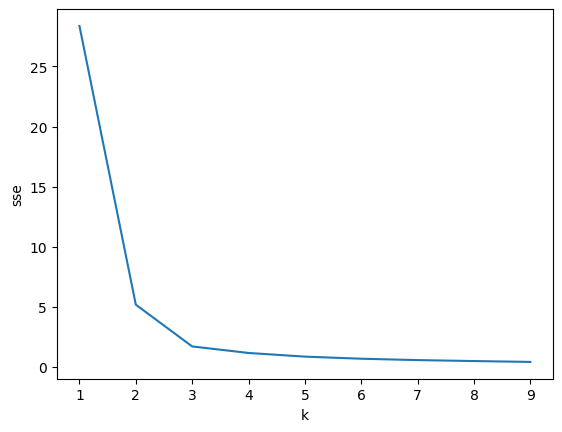

In [66]:
plt.plot(k_rng,sse)
plt.xlabel('k')
plt.ylabel('sse')
plt.show()
